# Exploring statistical data from the history of the Olympic Games

**Centent**

The athlete_events.csv file contains 271116 rows and 15 columns; each row corresponds to one and only one athlete participating in a single Olympic event (athlete-events).
The columns are:

1. ID - Unique number for each athlete;
2. Name - Name of the athlete;
3. Sex - M or F;
4. Age - Integer;
5. Height - In centimeters;
6. Weight - In kilograms;
7. Team - Name of the team;
8. NOC - National Olympic Committee (three letter code);
9. Games - Year and season;
10. Year - Whole;
11. Season - Summer or Winter;
12. City - City of organization;
13. Sport - Sport;
14. Event - Event;
15. Medal - Gold, Silver, Bronze, or NA.

# 1. Loading modules

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("./data"))

['athlete_events.csv', 'marks.txt', 'marks2.txt', 'noc_regions.csv']


# 2. Loading Data

In [3]:
# DataFrame athlete_events file data
data = pd.read_csv("./data/athlete_events.csv") 

# DataFrame noc_regions.csv file data
regions = pd.read_csv("./data/noc_regions.csv")

# 3. Info about the two datasets

We're going:

1. Display the first lines;
2. Use the two functions "describe" and "info" to display statistics, type of data, name of columns and other information.

In [4]:
# Display the first 5 lines of the "data" Dataframe
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
# Show the first five lines of "regions"
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 4. Concatenation of the two dataframes

We can concatenate the two dataframes, using the "NOC" key with the "Merge" function of Pandas ([see the documentation] (https://pandas.pydata.org/pandas-docs/stable/merging.html))

In [37]:
# Concatenation of the two dataframes
merged = pd.merge(data,regions,on="NOC")

Display the first lines of the results:

In [38]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


# 5. Age distribution of "golden" medalists

Create a dataframe representing the "golden" medalists

In [39]:
goldMedals = merged [ merged['Medal'] == 'Gold' ]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
68,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China,NaN
77,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China,NaN
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN
104,18005,Cao Yuan,M,17.0,160.0,42.0,China,CHN,2012 Summer,2012,Summer,London,Diving,Diving Men's Synchronized Platform,Gold,China,NaN
105,18005,Cao Yuan,M,21.0,160.0,42.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Springboard,Gold,China,NaN


We want to design the Age distribution of the athletes. First of all, we must check if there are NaN values in the "Age" column.

In [40]:
# Use the isnull () function
merged['Age'].isnull().sum()

9462

Let us take only the different values of NaN.

In [41]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [42]:
goldMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
68,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China,NaN
77,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China,NaN
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN
104,18005,Cao Yuan,M,17.0,160.0,42.0,China,CHN,2012 Summer,2012,Summer,London,Diving,Diving Men's Synchronized Platform,Gold,China,NaN
105,18005,Cao Yuan,M,21.0,160.0,42.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Springboard,Gold,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269895,129665,"Hannelore ""Hanni"" Wenzel (-Weirather)",F,23.0,165.0,57.0,Liechtenstein,LIE,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Alpine Skiing Women's Giant Slalom,Gold,Liechtenstein,NaN
269896,129665,"Hannelore ""Hanni"" Wenzel (-Weirather)",F,23.0,165.0,57.0,Liechtenstein,LIE,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Alpine Skiing Women's Slalom,Gold,Liechtenstein,NaN
270328,86592,Vnuste Niyongabo,M,22.0,176.0,60.0,Burundi,BDI,1996 Summer,1996,Summer,Atlanta,Athletics,"Athletics Men's 5,000 metres",Gold,Burundi,NaN
270492,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam,NaN


Drawing of the age distribution of athletes:

Text(0.5, 1.0, 'Distribution of Gold Medals')

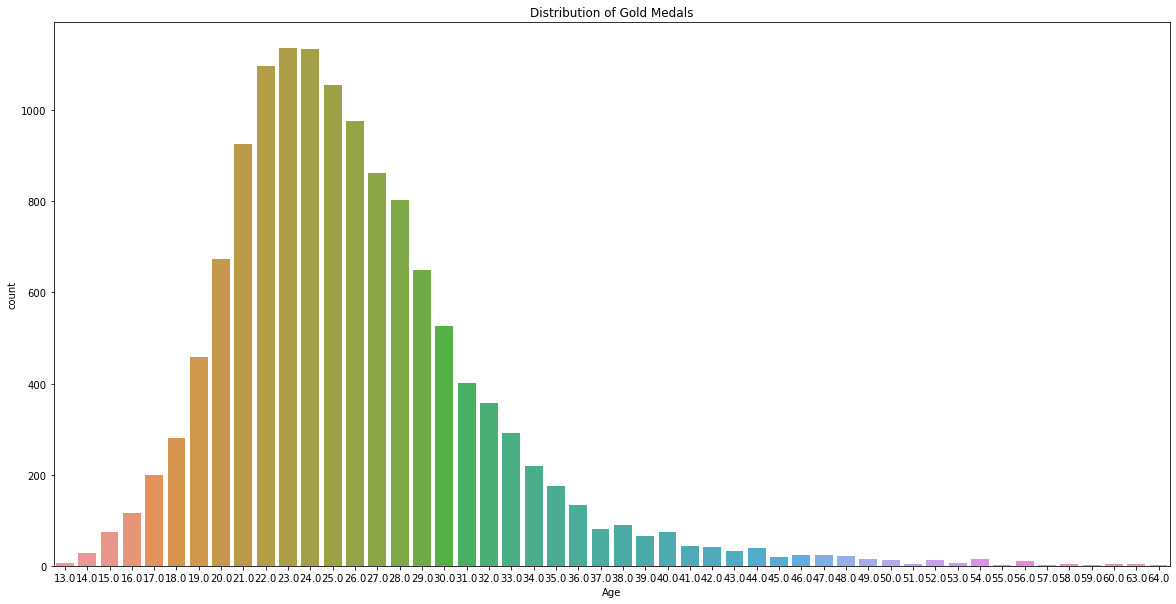

In [26]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

It looks like we have people over 50 with a gold medal: count their numbers

In [43]:
goldMedals[goldMedals['Age']>=50]["Name"].count()

77

What disciplines allow you to win a gold medal after your fiftieth?

In [45]:
masterDisciplines = goldMedals[goldMedals['Age']>=50].groupby("Sport")["Name"].count()
print(masterDisciplines)
masterDisciplines.max()

Sport
Alpinism             1
Archery             11
Art Competitions     8
Croquet              1
Curling              2
Equestrianism       22
Fencing              1
Roque                1
Sailing             17
Shooting            13
Name: Name, dtype: int64


22

Text(0.5, 1.0, 'Gold medals for athletes over 50')

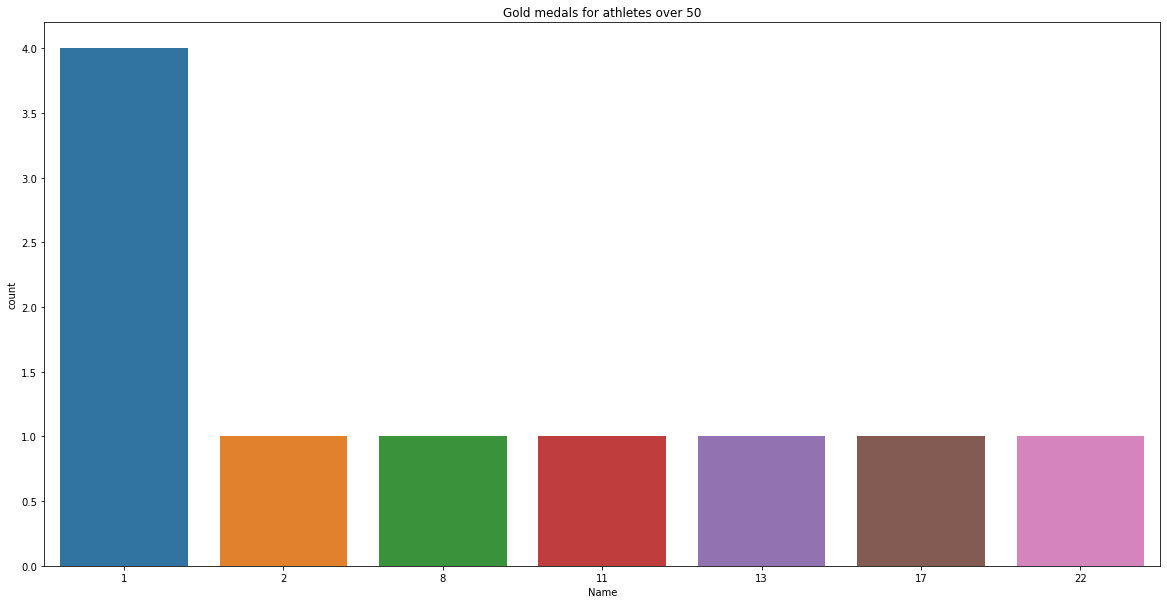

In [47]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold medals for athletes over 50')

# 6. Femmes en athlétisme

En étudiant les données, nous pouvons compter le nombre de médailles gagnées par les femmes durant l'histoire des Jeux olympiques d'été

Créer un dataframe des femmes ayant participé aux jeux d'été:

In [ ]:
womenInOlympics = 

Afficher les 10 première lignes:

Créer un plot du nombre de médailles gagnées (axe des $y$) par des femmes par année (axe des $x$)

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Femmes médalaistes par compétition');

Afficher les 10 athlètes femmes, dans la liste, qui ont participées aux jeux d'été de 1900 

Compter leurs nombres

# 7. Médailles par pays

Afficher le top 5 des pays qui ont gagné le plus grand nombre de médailles en Or:

Faire un plot:

In [ ]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar");
g.set_xlabels("Top 5 des pays")
g.set_ylabels("Nombre de médailles")
plt.title('Médailles par pays');

# 8. Disciplines avec le plus grand nombre de médailles d'or

Créer un dataframe contenant les athlètes des USA qui ont gagné une médaille d'Or.

Compter leurs nombres par discipline:

Vérifier, en affichant les médallistes hommes en Or du Sport Basketball des USA, que les médailles sont octroyées à chaque membre de l'équipe.

In [ ]:
basketballGoldUSA = 

In [ ]:
basketballGoldUSA.head(15)

Il se peut (dans votre solution) que les médailles ne sont pas regroupées par Edition / Equipe mais vous comptiez les médailles d'or de chaque membre de l'équipe!
Si c'est le cas, il faut regrouper les athlètes par année - l'idée est de créer un nouveau dataframe pour faire un filtre en utilisant uniquement le premier enregistrement pour chaque membre de l'équipe.

In [ ]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

Compter leur nombre :

# 9. Quelle est la taille / le poids médian d'un médaillé olympique ?

Faire un plot de type scatterplot de la taille vs le poids pour visualiser leur distribution (sans regroupement par discipline).

Afficher les premières lignes du DataFrame goldMedals et vérifier qu'il existe des lignes avec des valeurs NaN pour le poids et la taille

In [ ]:
goldMedals.head()

La première chose à faire est de collecter des informations générales sur le dataframe que vous allez utiliser: goldMedals.

In [ ]:
goldMedals.info()

Créer un dataframe contenant seulement les lignes où nous avons l'information sur la taille et le poids des athlètes

In [ ]:
notNullMedals = 

Afficher ses premières lignes et ses informations

In [ ]:
notNullMedals.head()

In [ ]:
notNullMedals.info()

scatterplot du poids vs. taille

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists');

Afficher les athlètes dont leurs poids est supérieur à 160 kilograms

# 10. Évolution des Jeux olympiques au fil du temps

Nous allons essayer de répondre aux questions suivantes:

* Comment le nombre d'athlètes/pays a varié au fil du temps ?
* Comment la proportion d'hommes/femmes varie-t-elle avec le temps ?
* Qu'en est-il de l'âge moyen, du poids et de la taille au fil du temps ?

*** 10.1 Evolution des athlètes hommes / femmes au fil du temps (Jeux d'été) ***

Créer deux dataframes divisant la population de l'ensemble de données à l'aide de Sex et Season (considérer seulement les jeux d'été)

In [ ]:
MenOverTime = 
WomenOverTime = 

Afficher les premières lignes du dataframe des hommes

In [ ]:
MenOverTime.head()

Plot de l'évolution du nombre d'athlètes masculins au fil du temps, puis celui des athlètes féminins

In [ ]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title("Evolution du nombre d'athlètes masculins");

In [ ]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title("Evolution du nombre d'athlètes féminins");

***10.2 Evolution de l'age des athlètes italiens *** 

Commençant par examiner l'ensemble de données MenOverTime pour actualiser les colonnes

In [ ]:
MenOverTime.head(5)

Créer un dataframe contenant les athlètes (hommes) italiens

In [ ]:
itMenOverTime = 

Affichage des 5 premières lignes

In [ ]:
itMenOverTime.head(5)

plot de l'age en fonction des années

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itMenOverTime, palette='Set2')
plt.title('Variation of Age for Italian Male Athletes over time')

Faire la même chose pour les femmes

In [ ]:
itWomenOverTime = 

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itWomenOverTime, palette='Set2')
plt.title('Variation of Age for Italian Female Athletes over time')